# Bank Churn Predictive Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\welcome\xebia_training_data\datasets\Bank_churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [8]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


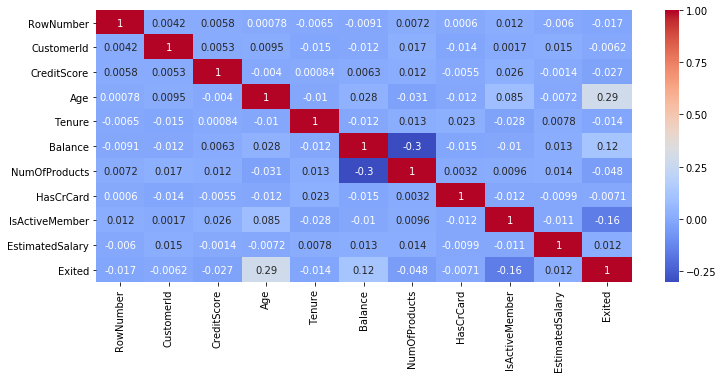

In [9]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [10]:
#important features are age,balance,isactivemember

## Anova
    pvalue<alpha =reject the null hypothesis(feature is important)
    pvalue>alpha =accept the null hypothesis(feature is not important)
    alpha=1-CI=1-0.95=0.05

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [13]:
num=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
xd=df[num]
yd=df['Exited']
from sklearn.feature_selection import f_classif
fscore,pvalue=f_classif(xd,yd)

for i in range(len(num)):
    print(num[i],pvalue[i])    

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


In [14]:
alpha=0.05
for i in range(len(pvalue)):
    if pvalue[i]<alpha:
        print(num[i],"It is important")
    else:
        print(num[i],"NOt important")

CreditScore It is important
Age It is important
Tenure NOt important
Balance It is important
NumOfProducts It is important
EstimatedSalary NOt important


In [15]:
#important features are creditscore,age,balance,numofproducts

## Chi Square Test

In [16]:
cat=["Geography",'Gender','HasCrCard','IsActiveMember']
xd=df[cat]
yd=df['Exited']

from sklearn.preprocessing import LabelEncoder
xd['Geography']=LabelEncoder().fit_transform(xd['Geography'])
xd['Gender']=LabelEncoder().fit_transform(xd['Gender'])

from sklearn.feature_selection import chi2
cscore,pvalue=chi2(xd,yd)

alpha=0.05
for i in range(len(pvalue)):
    if pvalue[i]<alpha:
        print(cat[i],"It is important")
    else:
        print(cat[i],"NOt important")

Geography It is important
Gender It is important
HasCrCard NOt important
IsActiveMember It is important


C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [17]:
#important features geography gender isactivemember

In [18]:
x=df[['CreditScore','Geography','Gender','Age','Balance','NumOfProducts','IsActiveMember']]
y=df['Exited']

In [19]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trans=ColumnTransformer([('ohe',OneHotEncoder(),[1,2])],remainder='passthrough')

trans.fit(x)
x2=trans.transform(x)
pd.DataFrame(x2).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,1.0,0.0,619.0,42.0,0.00,1.0,1.0
1,0.0,0.0,1.0,1.0,0.0,608.0,41.0,83807.86,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,502.0,42.0,159660.80,3.0,0.0
3,1.0,0.0,0.0,1.0,0.0,699.0,39.0,0.00,2.0,0.0
4,0.0,0.0,1.0,1.0,0.0,850.0,43.0,125510.82,1.0,1.0


In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,xtrain_output,xtest_output=train_test_split(x2,y,test_size=0.2,random_state=5)

In [22]:
print(xtrain.shape)
print(xtrain_output.shape)
print(xtest.shape)
print(xtest_output.shape)


(8000, 10)
(8000,)
(2000, 10)
(2000,)


In [23]:
pd.DataFrame(xtrain).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,1.0,0.0,750.0,39.0,0.0,2.0,0.0
1,1.0,0.0,0.0,0.0,1.0,726.0,34.0,0.0,2.0,0.0
2,1.0,0.0,0.0,1.0,0.0,588.0,64.0,0.0,1.0,1.0
3,1.0,0.0,0.0,1.0,0.0,773.0,50.0,0.0,2.0,0.0
4,1.0,0.0,0.0,0.0,1.0,551.0,35.0,129717.3,2.0,0.0


## Machine Learning -Logistic Regression

In [25]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(xtrain,xtrain_output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
pred=model.predict(xtest)

In [27]:
s=pd.DataFrame({'Actual':xtest_output,'Predicted':pred})
s.sample(10)

,Actual,Predicted
2048,0,0
1059,0,1
958,0,1
9171,0,0
7789,0,0
9058,0,0
3327,0,0
6517,0,0
4070,0,0
3292,0,0


In [28]:
from sklearn import metrics
metrics.accuracy_score(xtest_output,pred)

0.784

In [30]:
print("Recall",metrics.recall_score(xtest_output,pred))
print("Precision",metrics.precision_score(xtest_output,pred))
print("F1Score",metrics.f1_score(xtest_output,pred))

Recall 0.5185185185185185
Precision 0.4697986577181208
F1Score 0.4929577464788732
